# Data Analytics - ISIS twitter's fans - NER e Sentiment Analysis

Autori
- **Volpato Mattia 866316**
- **Preziosa Alessandro 866142**

## Installazione prime dipendenze e Importazione delle librerie

In [ ]:
!pip install spacy nltk matplotlib
!pip install levenshtein scikit-learn

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 596.6 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install tqdm

In [ ]:
import pandas as pd
import numpy as np
import re, nltk
from datetime import datetime, time as tm

from tqdm import tqdm

## Importazione del Dataset e primo preprocessing del testo

In [ ]:
df = pd.read_csv("tweets.csv")
print("Dimension:", df.shape)
df.head()

Dimension: (17410, 8)


,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...


Remove Links and machine-added text(i.e. "ENGLISH TRANSLATION")

In [ ]:
for i in range(50, 60):
    print(df.iloc[i, 7], f"EOL{i}")#prima del preprocessing. Nota che alcuni tweet si espandono su più righe.

aNOr/s/mTE2/s/bTlT/s/m8S8
http:. EOL50
#ولاية_دمشق

مرتدین صحوات کے دو افراد ھلاک اور دیگر زخمی ہوگئے، یہ EOL51
افراد جنوب دمشق یلدا میں ضلع الزین کی جانب جانیوالی ٹنل EOL52
Nusra used to have a 5 to 7 km frontline against IS in North-Aleppo. IS could never advance from that side. EOL53
@macroarch: أبو سمرا، طرابلس، لبنان 
Abo Samra, Tripoli, Lebanon ht EOL54
tp://t.co/sNAkcqB7MR/s/tFTW EOL55
For Sake of Allah
return_of_the_gold_dinar
https://t.co/ZxKdY9oIK7/s/a7HH
http://t.co/nhkQJGxRjR/s/V84v
http://t.co/jkDo16p9fX/s/VI21 http:. EOL56
حشد الشعبي کا مددگار صحوات الجیسات کا عنصر عدنان الجبوري آج #المال EOL57
حة / #بيجي میں جنود #الخلافة کے ہاتھوں ھلاک ہوگیا۔ http://t.co/CDoM EOL58
E58qi7/s/L7uu EOL59


In [ ]:
patterns = r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)|ENGLISH TRANSLATION(:|-)?|ENGLISH TRANSCRIPT|#|@|&amp|\n)'
#\n is removed. This is because we have tweets with multiple lines.
# '#' and '@ are to be removed because they can interfere with the entities extracted
def preprocess(s):
    return re.sub(patterns, '', s)
df['tweets'] = df['tweets'].apply(preprocess)

In [ ]:
for i in range(50, 60):
    print(df.iloc[i, 7], f"EOL{i}")#dopo il preprocessing

aNOr/s/mTE2/s/bTlT/s/m8S8http:. EOL50
ولاية_دمشقمرتدین صحوات کے دو افراد ھلاک اور دیگر زخمی ہوگئے، یہ EOL51
افراد جنوب دمشق یلدا میں ضلع الزین کی جانب جانیوالی ٹنل EOL52
Nusra used to have a 5 to 7 km frontline against IS in North-Aleppo. IS could never advance from that side. EOL53
macroarch: أبو سمرا، طرابلس، لبنان Abo Samra, Tripoli, Lebanon ht EOL54
tp://t.co/sNAkcqB7MR/s/tFTW EOL55
For Sake of Allahreturn_of_the_gold_dinar http:. EOL56
حشد الشعبي کا مددگار صحوات الجیسات کا عنصر عدنان الجبوري آج المال EOL57
حة / بيجي میں جنود الخلافة کے ہاتھوں ھلاک ہوگیا۔  EOL58
E58qi7/s/L7uu EOL59


## language detection

In [ ]:
!pip install langid

In [ ]:
import langid
langs = df["tweets"].apply(langid.classify)

In [ ]:
df["lang"] = [x[0] for x in langs]

In [ ]:
df[df["lang"] =='en'].shape

(14610, 9)

In [ ]:
df["lang"].to_csv("linguaTrovata.csv")

<Axes: xlabel='lang'>

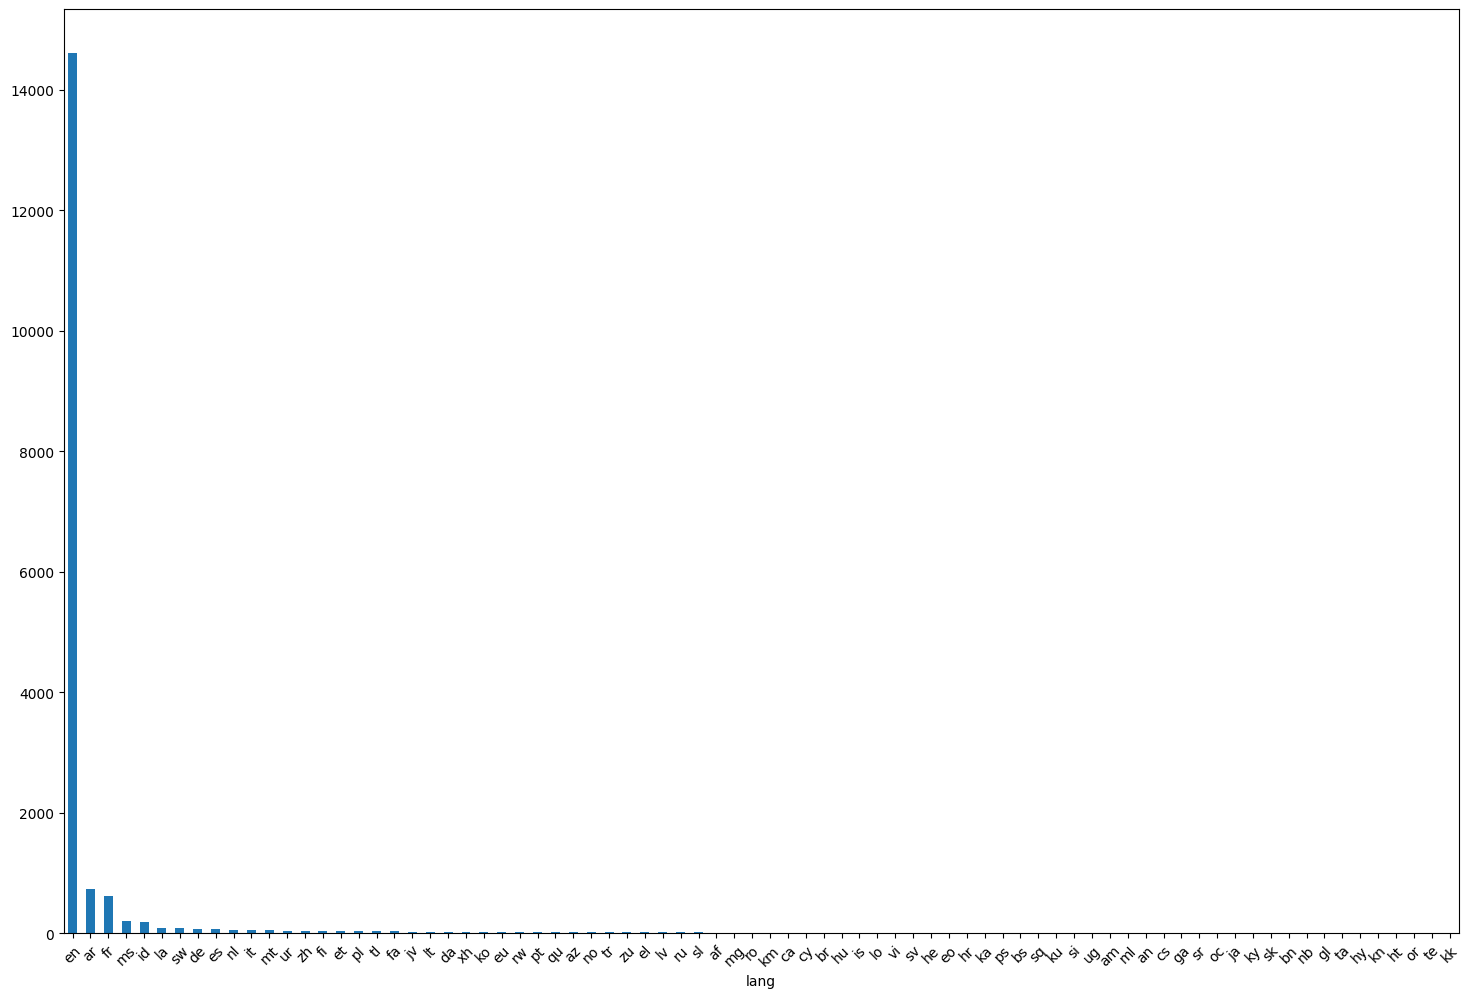

In [ ]:
df["lang"].value_counts().plot(kind = 'bar', rot=45,figsize=(18,12))

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
tweetsToTranslate = df[df["lang"] !='en']

## Traduzione tweet in inglese

effettiva traduzione + serializzazione risultato:

In [ ]:
# t=[]
# for index, row in tweetsToTranslate.iterrows():
#     t.append(translator.translate(row["tweets"], dest='en'))
#     print(row["tweets"])
# soloTradotti = [x.text for x in t ]
# tradDF=pd.DataFrame(soloTradotti)

In [ ]:
# csv_data = tradDF.to_csv('soloTradottiIndexFalse.csv', index = False)

dato che abbiamo già fatto la traduzione (sopra commentata), leggiamo direttamente i risultati:

In [ ]:
soloTradotti = pd.read_csv("soloTradottiIndexFalse.csv")
soloTradotti = soloTradotti["0"] #il csv viene salvato con una colonna sola cioè "0"
assert len(soloTradotti) == len(tweetsToTranslate)

In [ ]:
soloTradotti.head()

0    Halidmaghrebi seyiful mashel123 Cheerleadunic ...
1    NEW LINK, AFTER PREVIOUS ONE TAKEN DOWN:AQAP-'...
2    SHEIKH ABU HASAN AL KUWAITI (HA) ADVICE OF NAB...
3    SHEIKH ABU HASSAN AL KUWAITI (HA): ADVICE OF N...
4    Download Jn Video with English Subtitles: The ...
Name: 0, dtype: object

### Creiamo una colonna per i tweet tradotti ora + quelli che originariamente erano in inglese

In [ ]:
posiz = df["lang"] !='en'
n=len(df)
j=0
newCol=[]
for i in range(0,n):
    if posiz[i]: #tweet non-inglese
        tweetInInglese = soloTradotti.iloc[j]
        j+=1
        print(df["tweets"][i], " -> ", tweetInInglese)
    else:
        tweetInInglese = df["tweets"][i]
    newCol.append(tweetInInglese)
# forse è meglio ner su questi^ ->dopo

KhalidMaghrebi seifulmaslul123 CheerLeadUnited IbnNabih1  ->  Halidmaghrebi seyiful mashel123 Cheerleadunic ibnabih1
NEW LINK, AFTER PREVIOUS ONE TAKEN DOWN:AQAP-'THE FACES HAVE BEEN BRIGHTENED' -REGARDING THE BLESSED ATTACK IN FRANCE   ->  NEW LINK, AFTER PREVIOUS ONE TAKEN DOWN:AQAP-'THE FACES HAVE BEEN BRIGHTENED' -REGARDING THE BLESSED ATTACK IN FRANCE
 SHEIKH ABU HASAN AL KUWAITI (HA) ADVICE OF NABI S.A.W TO THE MUJAHIDEEN:    ->  SHEIKH ABU HASAN AL KUWAITI (HA) ADVICE OF NABI S.A.W TO THE MUJAHIDEEN:
SHEIKH ABU HASSAN AL KUWAITI (HA): ADVICE OF NABI SAW TO THE MUJAHIDEEN:    ->  SHEIKH ABU HASSAN AL KUWAITI (HA): ADVICE OF NABI SAW TO THE MUJAHIDEEN:
DOWNLOAD JN Video With English Subtitles: The Path of Salvation سبيل_النجاة   ->  Download Jn Video with English Subtitles: The Path of Salvation
‍‌‌‌‌‍‌‌‌🔻‌‌[ الإثنين  1436/9/19 هـ ]‍‌‌‌‌‍‍‍‍‌🔺‌النّشرة صوتيّة | ‍‌‌‌‌‍‌‍‍‍‌🔊‌‌ و مكتوبة | دولة_الخلافة  ->  ‍ Comp decided [Monday 9/19/1436 AH]‌‌ decided to writeCaliphate state
best ge

In [ ]:
assert len(newCol) == n
df["tweetsInEng"] = newCol

In [ ]:
!pip install afinn

importo afinn per fare SA dopo

In [ ]:
from afinn import Afinn
afinn = Afinn(emoticons=True)

In [ ]:
import nltk

nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   

True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# sia.polarity_scores("Wow, NLTK is really powerful!")["compound"]*5

In [ ]:
def myAfinnScore(s):
    scores = afinn.scores_with_pattern(s)

    if len(scores)==0:
        return 0
    else:
        sentParoleNonNeutre = [x for x in scores if x!=0]
        if len(sentParoleNonNeutre)==0:
            return 0
        else:
            return np.mean(sentParoleNonNeutre) / len(sentParoleNonNeutre)

In [ ]:
def sentimentScore(s):
    return np.mean([myAfinnScore(s), sia.polarity_scores(s)["compound"]*5])

In [ ]:
def dictSort(dict):
    keys = list(dict.keys())
    values = list(dict.values())
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    return sorted_dict

import Levenshtein
def insertEntSentApprox(mapEntSent, ent, sentiment):# inserisco nel dizionario la coppia nomeEntità:sentiment sse la distanza di edit tra nomeEntità e il nome di entità già presenti è abbastanza grande (->nuova enità mai vista); sennò sentiment si accoda agli altri valori associati a quella chiave che è la più vicina al nome della nostra entità da inserire
    #restituisco il nome di entità a cui mappo "ent"

    # print("mapEntSent", mapEntSent)
    # print("ent", ent)
    distanceDict = {k:Levenshtein.distance(k, ent) for k in mapEntSent.keys()}#{Levenshtein.distance(k, ent) for k in mapEntSent.keys()}
    if len(distanceDict)==0:
        mapEntSent[ent] = [sentiment]#se mappa vuota ->crea nuova chiave
    else:
        sorted = dictSort(distanceDict)
        nomeAdistanzaMinima = next(iter(sorted))# nome entità + simile al nostro nome entità da inserire
        # print("chiave a distanzaMinima: ", distanzaMinima)
        threshold = np.max([len(ent), len(nomeAdistanzaMinima)]) *0.4
        if(distanceDict[nomeAdistanzaMinima]>threshold):#se nome da inserire è troppo distante ->crea nuova chiave
            mapEntSent[ent] = [sentiment]
            return ent #restituisco il nome di entità a cui mappo "ent"
        else:
            mapEntSent[nomeAdistanzaMinima] = mapEntSent[nomeAdistanzaMinima] + [sentiment]#concat
            return nomeAdistanzaMinima #restituisco il nome di entità a cui mappo "ent"




In [ ]:
primiHashtag="""isis
syria
iraq
is
aleppo
usa
turkey
breakingnews
russia
assad
ypg
palmyra
breaking
islamicstate
libya
homs
mosul
saudi
saa
amaqagency
fallujah
israel
damascus
baghdad
iran
iraqi
ramadi
sinai
twitterkurds
us
gaza
aamaq
deirezzor
egypt
anbar
khanasir
syrian
rebels
hezbollah
lebanon
fsa
jordan
russian
raqqa
brussels
pkk
hamas
sdf
turkish"""

In [ ]:
splittedHashtags = primiHashtag.split("\n")
mapEntSentWithoutPreProc={}
mapEntSentWithoutPreProc = {k:[] for k in splittedHashtags}

## Proviamo ad estrarre subito le entità e a fare SA

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
tweetSents=[]
# mapEntSentWithoutPreProc={}
entities = []
entities_labels = []
n=len(df)
for i in tqdm(range(n), desc='Entities extraction'):
    record = df.iloc[i, :]
    tweet = nlp(record['tweetsInEng'])
    sentences = [x for x in tweet.sents]
    ents, labels = [], []   #lista entità di tutto il tweet
    for s in sentences:
        sentiment = sentimentScore(str(s).lower())
        for e in s.ents:#ognuna di queste entità di questa sentence avrà lo score di sentiment della sentence s a cui appartiene.
            nomeMappato = insertEntSentApprox(mapEntSentWithoutPreProc, str(e).lower(), sentiment)
            ents.append(nomeMappato)
            labels.append(e.label_)

    entities.append(ents)
    entities_labels.append(labels)
    tweetSents.append(sentimentScore(str(tweet).lower()))

assert len(entities) == len(df)
assert len(tweetSents) == len(df)
df["EntitiesWithoutPreProc"] = entities
df["tweetSentimentWithoutPreProc"] = tweetSents
df['entity_type_no_preprocessing'] = entities_labels

Entities extraction: 100%|██████████| 17410/17410 [11:25<00:00, 25.42it/s]


In [ ]:
for i in mapEntSentWithoutPreProc:
    mapEntSentWithoutPreProc[i] = np.mean(mapEntSentWithoutPreProc[i])# ora ad ogni entry corrisponde la media degli score delle frase in cui compare

## Proviamo la NER con ulteriore preprocessing

### tokenization + stopWords/punctuation removal

In [ ]:
df["tweetsModified"] = df["tweetsInEng"]#.apply(lambda x: x.lower())

from nltk.tokenize import TweetTokenizer
tokening = TweetTokenizer()
tokening = TweetTokenizer(strip_handles=False, reduce_len=True)
#strip_handles: removes the citations
#reduce_len: reduces the length of words containing 3 repeated letters
df["tweetsModified"] = df["tweetsModified"].apply(TweetTokenizer().tokenize) #NOTE: now this column is not composed of strings anymore...now the are arrays of strings

nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = set(stop)
stop.add("…")
stop.add("...")
stop.add("..")
stop.add("https")
stop = list(stop)
stop = [item for item in stop if item.lower() not in ["not", "nor", "against"]] #tolgo dalla lista delle stopwords queste 3 parole
df["tweetsModified"] = df["tweetsModified"].apply(lambda x: [item for item in x if item not in stop]) #we want to keep negations for SA but not for dataInspection

import string
punctuation = string.punctuation
df["tweetsModified"] = df["tweetsModified"].apply(lambda x: [item for item in x if item not in punctuation])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


già che abbiamo i tweet processati facciamo..

### Data inspection: most frequent words

In [ ]:
from collections import Counter
import pickle
flat_list = [item for sublist in df["tweetsModified"] for item in sublist if item != "not" and item !="1"]# list all of words
with open('flat_list.pickle', 'wb') as handle:
    pickle.dump(flat_list, handle)
c = Counter(flat_list)
c.most_common(10)

[('RT', 5801),
 ('ISIS', 2272),
 ('Syria', 1636),
 ('killed', 1255),
 ('The', 1202),
 ('IS', 1119),
 ('I', 936),
 ('Iraq', 779),
 ('Islamic', 743),
 ('army', 739)]

In [ ]:
!pip install wordcloud

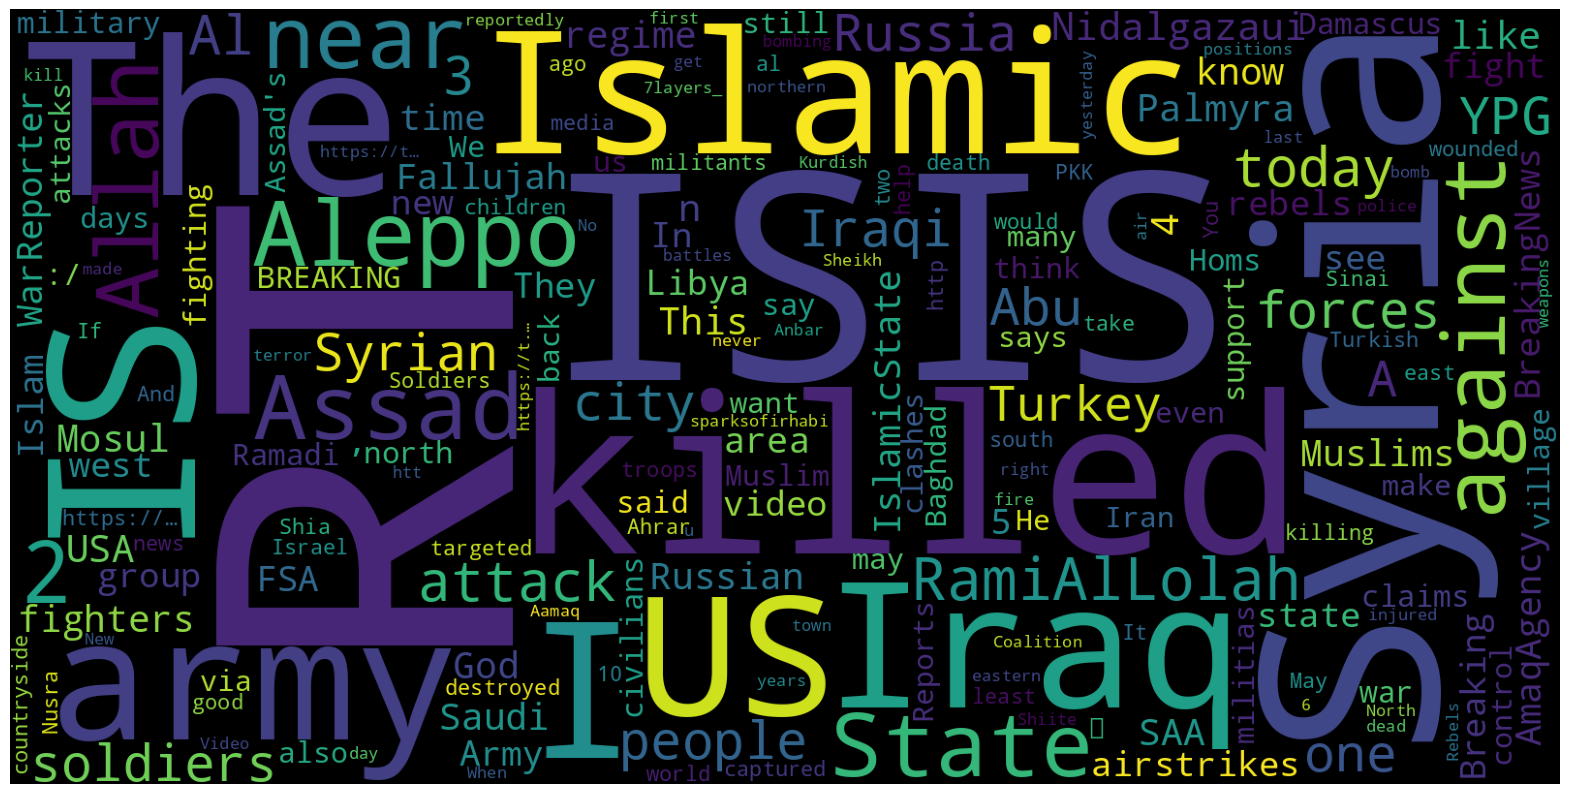

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

flat_list = [item for sublist in df["tweetsModified"] for item in sublist if item != "not" and item!="1"] #unique list containing all tokens
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

### Stemming

In [ ]:
from nltk.stem.lancaster import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
df["tweetsModified"] = df["tweetsModified"].apply(lambda x: [lancaster_stemmer.stem(item) for item in x])


riportiamo tweets come strighe e non più array di stringhe

In [ ]:
df["tweetsModified"] = df["tweetsModified"].apply(lambda x: " ".join(x))

 ## estraiamo effettivamente le entità + SA (con preprocessing)

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg

nlp2 = spacy.load("en_core_web_lg", exclude=["lemmatizer"])

In [ ]:
mapEntSentWithPreProc={}
mapEntSentWithPreProc = {k:[] for k in splittedHashtags}
entities = []
tweetSents = []
entities_labels = []
n=len(df)
for i in tqdm(range(n), desc='Entities extraction'):
    record = df.iloc[i, :]
    tweet = nlp2(record['tweetsModified'])
    # print(tweet)
    sentences = [x for x in tweet.sents]
    ents, labels = [], []
    for s in sentences:
        sentiment = sentimentScore(str(s).lower())
        for e in s.ents:#ognuna di queste entità di questa sentence avrà lo score di sentiment della sentence s a cui appartiene.
            nomeMappato = insertEntSentApprox(mapEntSentWithPreProc, str(e).lower(), sentiment)
            ents.append(nomeMappato)
            labels.append(e.label_)

    entities_labels.append(labels)
    entities.append(ents)
    tweetSents.append(sentimentScore(str(tweet).lower()))

assert len(entities) == len(df)
assert len(tweetSents) == len(df)
df["EntitiesWithPreProc"] = entities
df["tweetSentimentWithPreProc"] = tweetSents
df['entity_type_preprocessing'] = entities_labels

Entities extraction: 100%|██████████| 17410/17410 [12:40<00:00, 22.89it/s]


In [ ]:
for i in mapEntSentWithPreProc:
    mapEntSentWithPreProc[i] = np.mean(mapEntSentWithPreProc[i])#ora ad ogni entry corrisponde la media degli score delle frase in cui compare

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Confrontiamo i risultati delle due pipeline di NER

In [ ]:
for i in range(0,20):
    print("Tweet: {} -> Entities: {}".format(df.iloc[i]["tweets"], df.iloc[i]["EntitiesWithoutPreProc"]))

Tweet:  'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI:   -> Entities: ['syria - sheikh', 'abu muhammed']
Tweet:  SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF INTEGRITY, SACRIFICE IS  EASY'   -> Entities: ["al jawlani '", 'the people of integrity']
Tweet:  FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLANI (HA):   -> Entities: ["al jawlani '"]
Tweet:  SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP: 'THE PROMISE OF VICTORY':   -> Entities: ['al wuhayshi', 'leader', 'aqap', "the promise of victory'"]
Tweet:  AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT 'ALTHOUGH THE DISBELIEVERS DISLIKE IT.'  -> Entities: ['aqap']
Tweet: THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIER OF JN: Video Link :  -> Entities: ['clip']
Tweet:  : OH MURABIT! :   -> Entities: ['oh murabit']
Tweet:  'A COLLECTION OF THE WORDS OF THE U'LAMA REGARDING DAWLAH':   -> Entities: ["u'lama"]
Tweet: Aslm Please share our new account after the previous one was suspended.KhalidMaghrebi seifulmaslul123 CheerLe

In [ ]:
for i in range (0,20):
    print("Tweet: {} -> Entities: {}".format(df.loc[i, 'tweets'], df.loc[i]["EntitiesWithPreProc"]))

Tweet:  'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI:   -> Entities: ['syr sheikh', 'abu muham', 'al maqdis']
Tweet:  SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF INTEGRITY, SACRIFICE IS  EASY'   -> Entities: ['al jawlan', 'integr sacr']
Tweet:  FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLANI (HA):   -> Entities: ['first', 'al jawlan']
Tweet:  SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP: 'THE PROMISE OF VICTORY':   -> Entities: ['nasir al', 'vict']
Tweet:  AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT 'ALTHOUGH THE DISBELIEVERS DISLIKE IT.'  -> Entities: ['baghdad']
Tweet: THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIER OF JN: Video Link :  -> Entities: ['second']
Tweet:  : OH MURABIT! :   -> Entities: []
Tweet:  'A COLLECTION OF THE WORDS OF THE U'LAMA REGARDING DAWLAH':   -> Entities: ["u'lama", 'dawlah']
Tweet: Aslm Please share our new account after the previous one was suspended.KhalidMaghrebi seifulmaslul123 CheerLeadUnited -> Entities: ['aslm', 'prevy', 

Ci sembrano meglio i risultati estratti dalla pipeline senza preprocessing. D'ora in poi useremo questi.

### Salvataggio variabili

In [ ]:
df.to_csv("df.csv")
import pickle
with open('mapEntSentWithoutPreProc.pickle', 'wb') as handle:
    pickle.dump(mapEntSentWithoutPreProc, handle)

In [ ]:

# import pickle
# import matplotlib.pyplot as plt
# with open('mapEntSentWithoutPreProc.pickle', 'rb') as f:
#     mapEntSentWithoutPreProc = pickle.load(f)
# df = pd.read_csv("df.csv")

## Salvataggio del DataFrame **entity-tweet**

In [ ]:
df_to_serialize = df[['name', 'EntitiesWithoutPreProc', 'entity_type_no_preprocessing', 'tweetSentimentWithoutPreProc']]
df_to_serialize

,name,EntitiesWithoutPreProc,entity_type_no_preprocessing,tweetSentimentWithoutPreProc
0,GunsandCoffee,"[syria - sheikh, abu muhammed]","[ORG, ORG]",1.147000
1,GunsandCoffee,"[al jawlani ', the people of integrity]","[PERSON, ORG]",2.051250
2,GunsandCoffee,[al jawlani '],[PERSON],0.000000
3,GunsandCoffee,"[al wuhayshi, leader, aqap, the promise of vic...","[PERSON, ORG, PERSON, WORK_OF_ART]",1.128833
4,GunsandCoffee,[aqap],[PERSON],-1.954500
...,...,...,...,...
17405,Anaksabil97,[amaqagency fridaythe13th dolceamoreforgotten],[PERSON],0.000000
17406,Anaksabil97,"[iraqi, albouhayat, dubnation mufc]","[NORP, LOC, FAC]",-2.734750
17407,Anaksabil97,[],[],0.000000
17408,Anaksabil97,[],[],-1.454500


In [ ]:
df_to_serialize.to_excel("entity_tweet.xlsx", index=False)

# Sentiment analysis

## Salvataggio del dataframe **entity-sentiment**

In [ ]:
entity_sentiment_df = pd.DataFrame(mapEntSentWithoutPreProc.items(), columns=['Entity', 'Sentiment'])
entity_sentiment_df = entity_sentiment_df.fillna(0)
entity_sentiment_df = entity_sentiment_df.sort_values(by='Sentiment', ascending=False).reset_index(drop=True)
entity_sentiment_df

,Entity,Sentiment
0,muthanna,3.69475
1,suwayda,3.64925
2,the crusader belgiumhttps://t,3.56775
3,one or 2 years,3.46475
4,ladh,3.46475
...,...,...
7661,rt mintpressnews,-3.70200
7662,rt asgharbukhari,-3.70200
7663,imrbhachu,-3.70200
7664,"nwo!""is",-3.77200


In [ ]:
entity_sentiment_df.to_csv('entity_sentiment.csv', index=False)

In [ ]:
print("number of different entities: ", len(mapEntSentWithoutPreProc.keys()))

number of different entities:  7666


In [ ]:
(df["tweetSentimentWithoutPreProc"].value_counts())

tweetSentimentWithoutPreProc
 0.000000    5292
-3.176250     424
-1.000000     169
-0.500000     148
-1.691750     144
             ... 
-1.273750       1
 1.631417       1
-1.184972       1
 0.568556       1
-0.166500       1
Name: count, Length: 3448, dtype: int64

Text(0, 0.5, 'Number of Tweets')

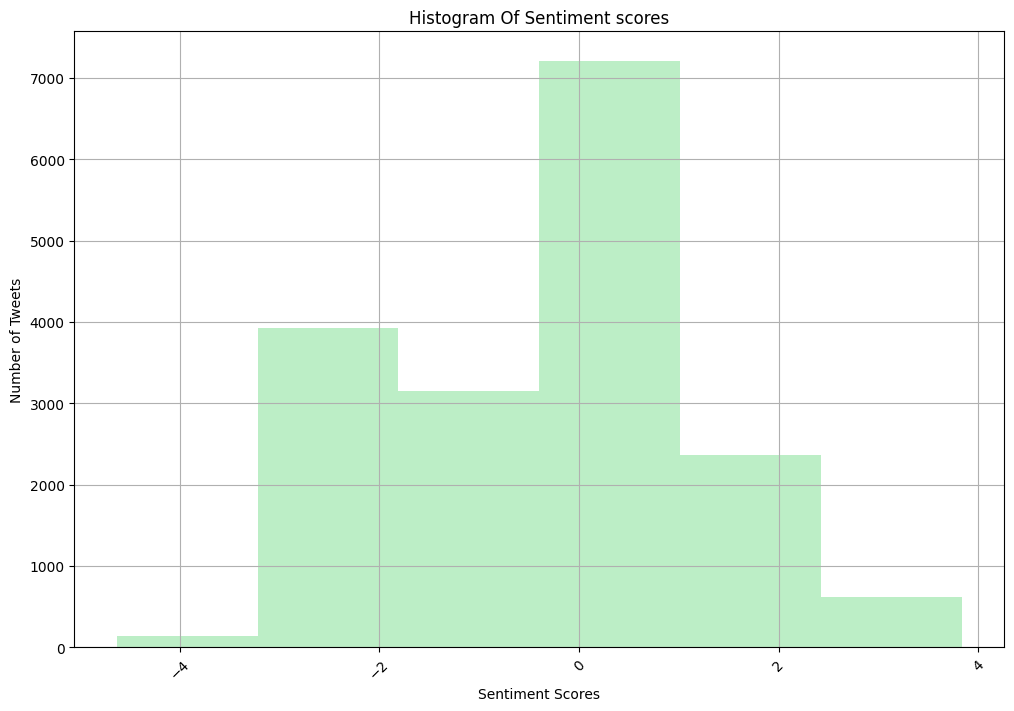

In [ ]:
#let's compute the range of afinn scores in this dataset
min(df["tweetSentimentWithoutPreProc"].value_counts().index.astype(int))
max(df["tweetSentimentWithoutPreProc"].value_counts().index.astype(int))
abs(min(df["tweetSentimentWithoutPreProc"].value_counts().index.astype(int)) - max(df["tweetSentimentWithoutPreProc"].value_counts().index.astype(int)))
#let's visualize the histogram of frequencies
df["tweetSentimentWithoutPreProc"].plot(kind='hist',
        alpha=0.7,
        bins = abs(min(df["tweetSentimentWithoutPreProc"].value_counts().index.astype(int)) - max(df["tweetSentimentWithoutPreProc"].value_counts().index.astype(int)))-1,
        title='Histogram Of Sentiment scores',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=10,
        color=['#A0E8AF'])
plt.xlabel('Sentiment Scores')
plt.ylabel("Number of Tweets")

Text(0, 0.5, 'Number of Tweets')

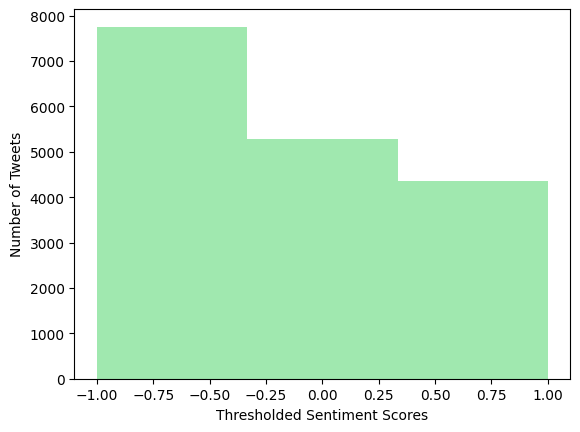

In [ ]:
sentimentQuantizzato = np.sign(df["tweetSentimentWithoutPreProc"])
sentimentQuantizzato.plot(kind='hist', color=['#A0E8AF'], bins=3)
plt.xlabel('Thresholded Sentiment Scores')
plt.ylabel("Number of Tweets")

### Normalizzo il sentiment e converto il tempo

In [ ]:
df["time"] = df["time"].apply(datetime.strptime, args=("%m/%d/%Y %H:%M",))
df["tweetSentimentWithoutPreProc"] = df["tweetSentimentWithoutPreProc"].apply(lambda x: x/5)

### Sentiment di tutti i tweet nel tempo

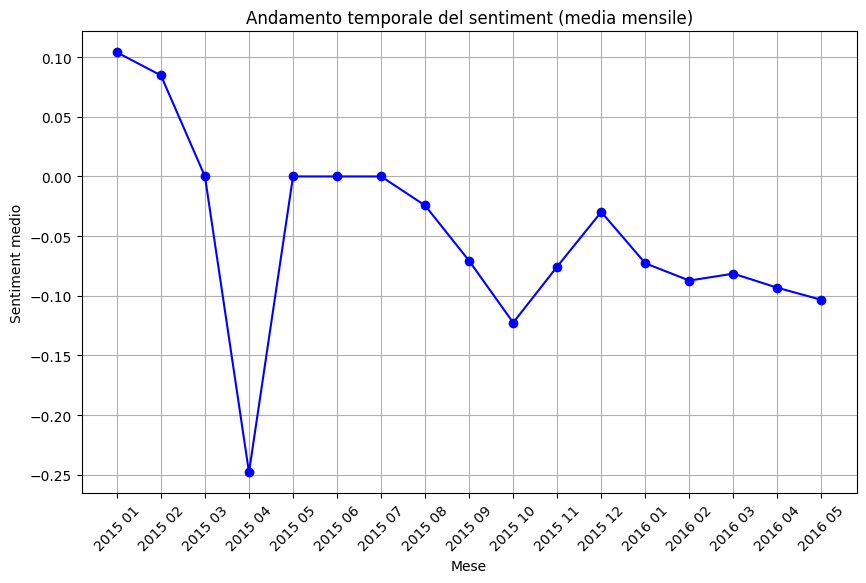

In [ ]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

import seaborn as sns
copia = DataFrame(df)

copia['time'] = pd.to_datetime(copia['time'])

# Raggruppamento dei dati per anno-mese e calcolo della media del sentiment
monthly_sentiment = copia.groupby(copia['time'].dt.strftime('%Y %m'))['tweetSentimentWithoutPreProc'].mean()
# print("monthly_sentiment: ", monthly_sentiment)
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='b')
plt.xlabel('Mese')
plt.xticks(rotation=45)
plt.ylabel('Sentiment medio')
plt.title('Andamento temporale del sentiment (media mensile)')
plt.grid(True)
plt.show()

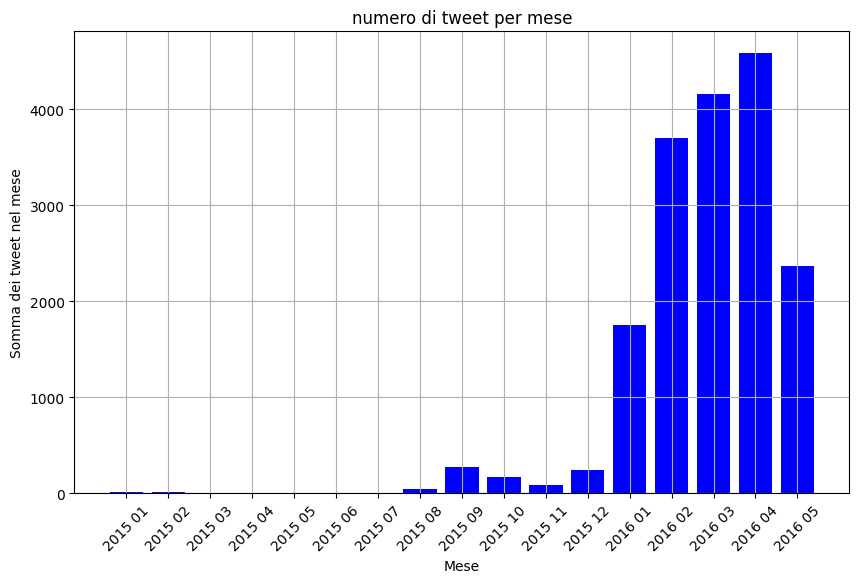

In [ ]:
monthly_tweets = copia.groupby(copia['time'].dt.strftime('%Y %m'))["lang"].count()
assert np.sum(monthly_tweets)==len(df)

plt.figure(figsize=(10, 6))
plt.bar(monthly_tweets.index, monthly_tweets.values, color='b')
plt.xlabel('Mese')
plt.xticks(rotation=45)
plt.ylabel('Somma dei tweet nel mese')
plt.title('numero di tweet per mese')
plt.grid(True)
plt.show()

## Ancora analisi univariata del sentiment

### Tweet's Sentiment Score PDF

Text(0, 0.5, 'Probability of Tweet to have this score')

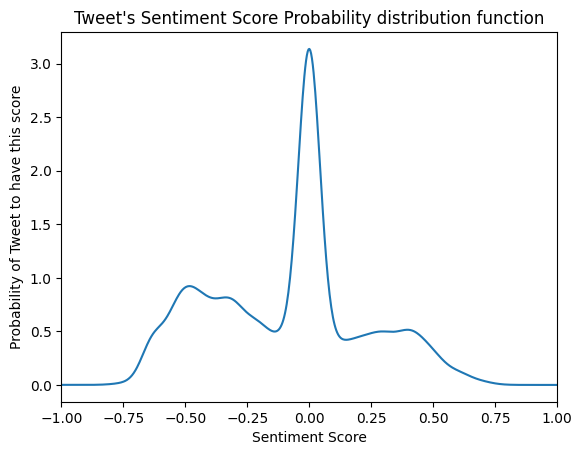

In [ ]:
df["tweetSentimentWithoutPreProc"].plot(kind="density", xlim=(-1,1))
plt.title("Tweet's Sentiment Score Probability distribution function")
plt.xlabel('Sentiment Score')
plt.ylabel("Probability of Tweet to have this score")

Text(0, 0.5, 'Sentiment Score')

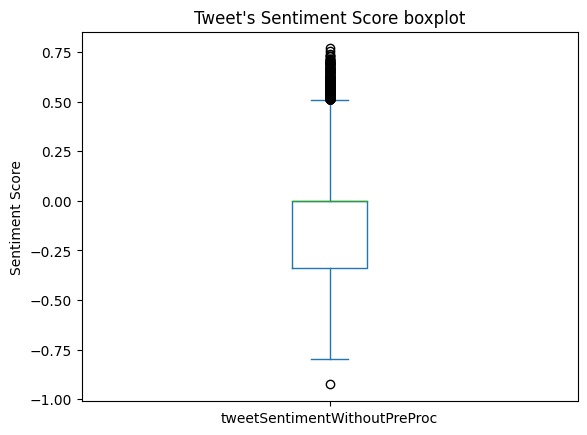

In [ ]:
df["tweetSentimentWithoutPreProc"].plot(kind="box")
plt.title("Tweet's Sentiment Score boxplot")
plt.ylabel('Sentiment Score')

# Variazione nel tempo del sentiment espesso dai tweet di un utente

## Guardiamo solo l'utente più attivo:

In [ ]:
suoi = df[df["username"]=="Uncle_SamCoco"]

Text(0, 0.5, 'Sentiment Score')

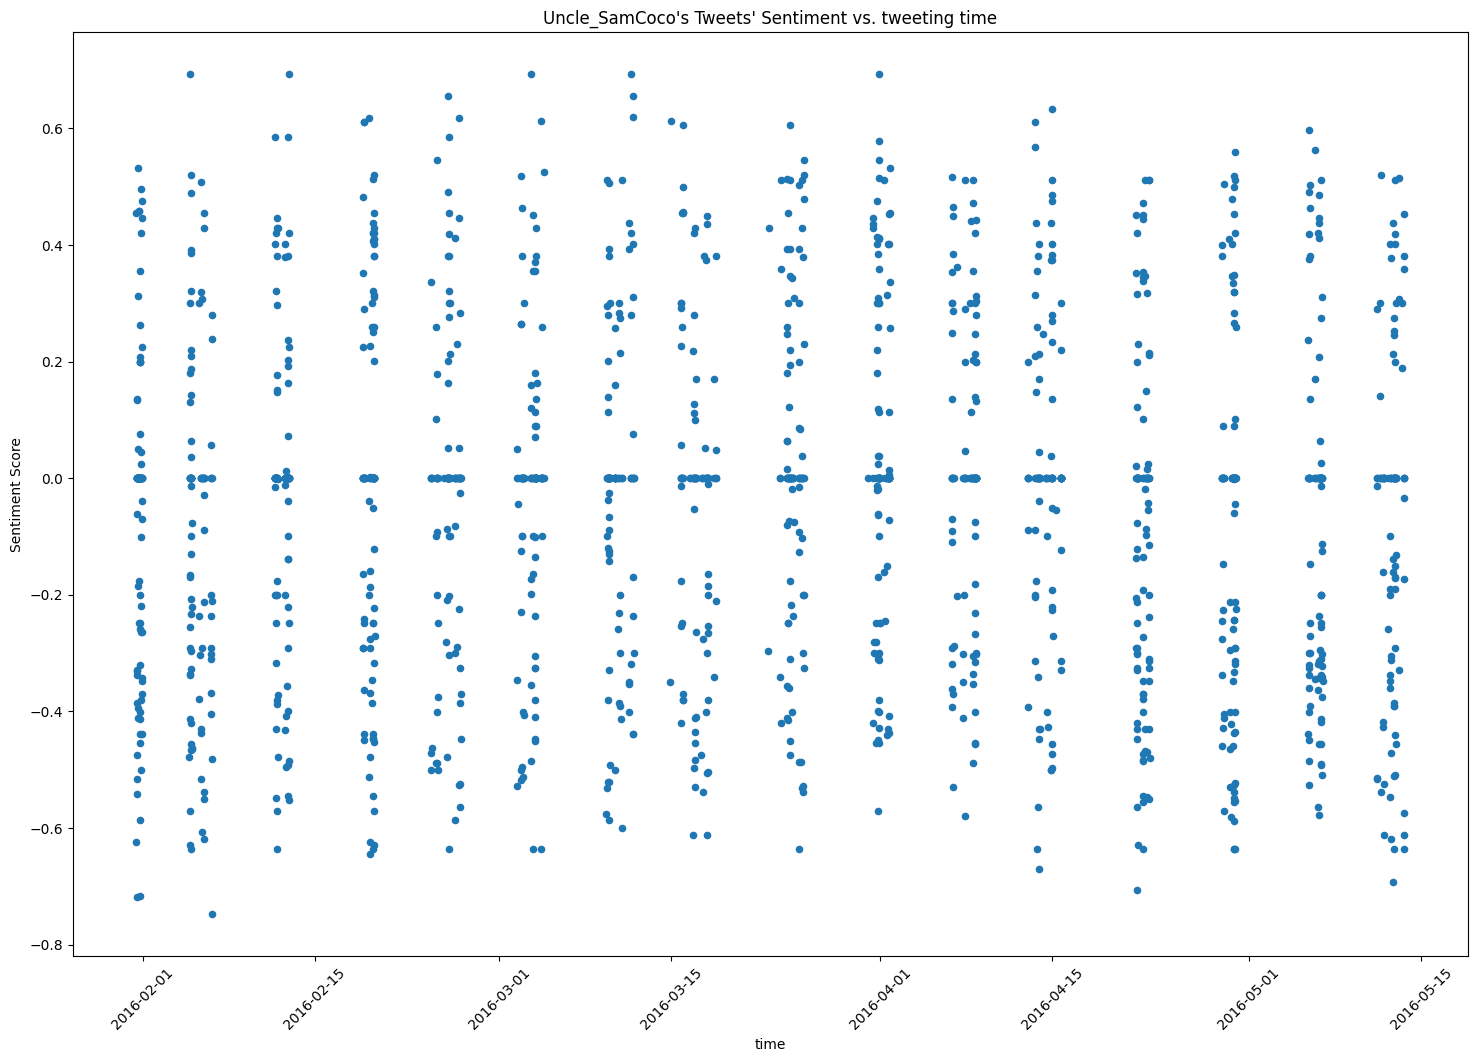

In [ ]:
suoi.plot.scatter(x="time", y="tweetSentimentWithoutPreProc",figsize=(18,12))
plt.xticks(rotation=45)
plt.title("Uncle_SamCoco's Tweets' Sentiment vs. tweeting time")
plt.ylabel('Sentiment Score')

Nota la burstiness dei tweet: l'utente non pubblica ogni giorno, ci periodi (anche 5gg) in cui non pubblica proprio.

<ipython-input-64-1feeec599168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suoi['time'] = pd.to_datetime(suoi['time'])


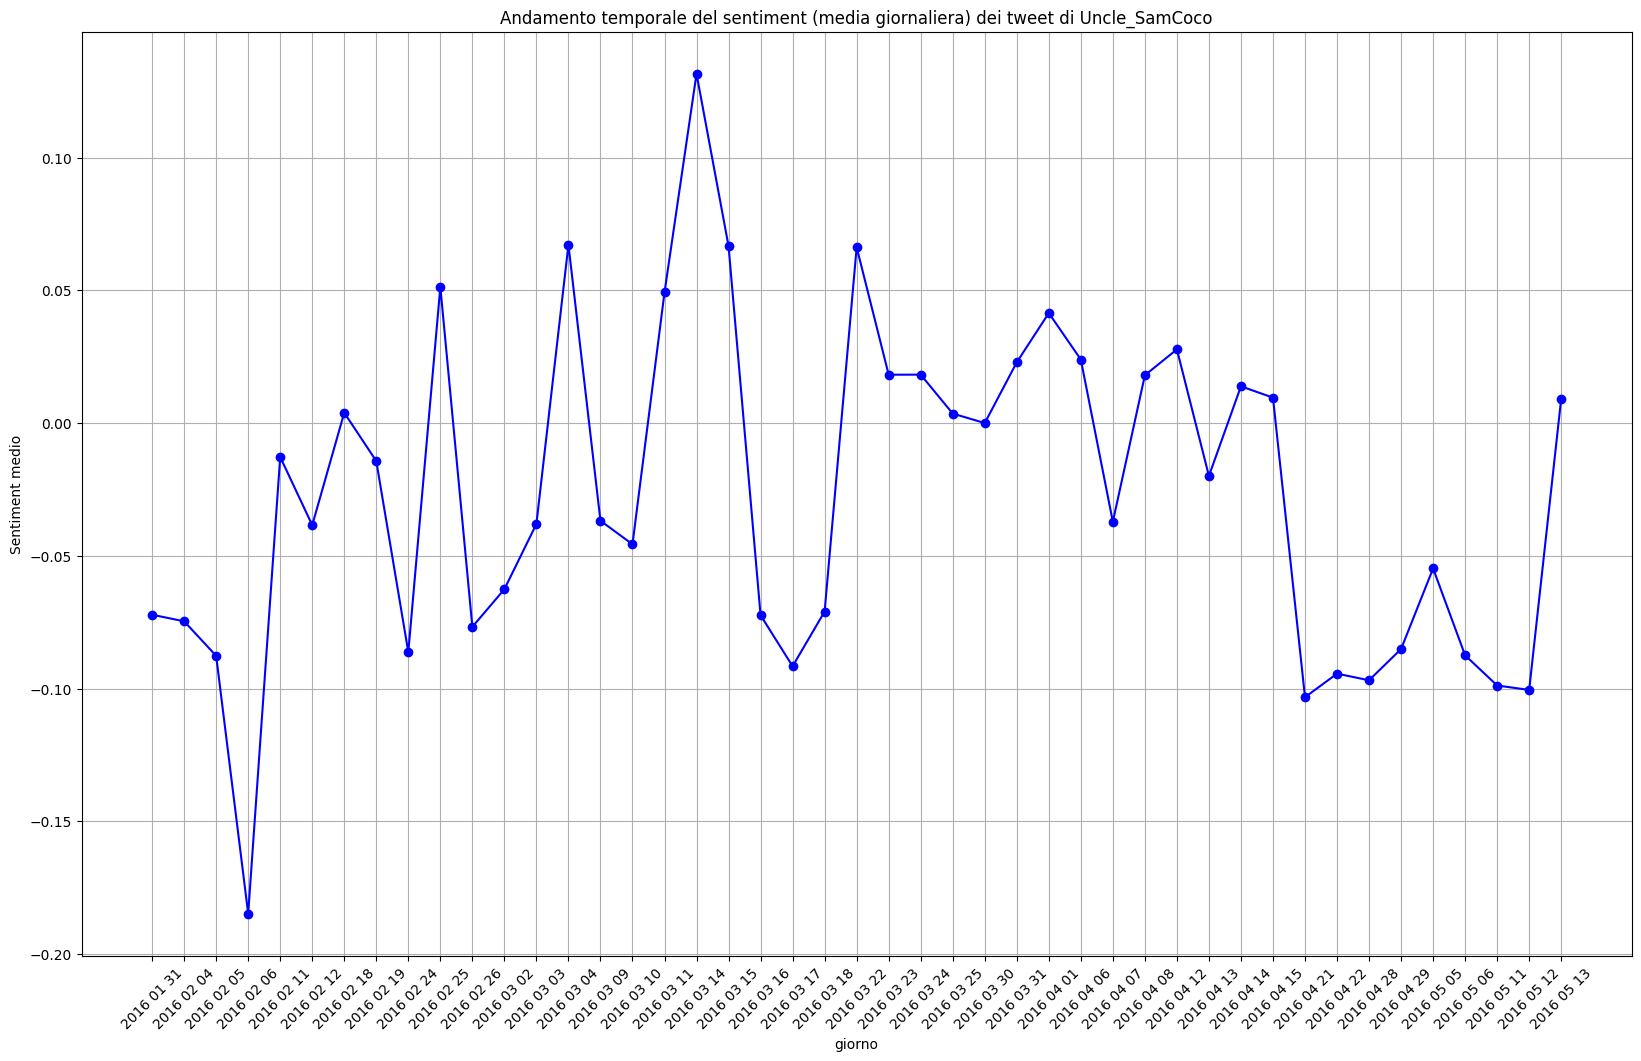

In [ ]:
suoi['time'] = pd.to_datetime(suoi['time'])

# Raggruppamento dei dati per anno-mese-giorno e calcolo della media del sentiment
monthly_sentiment = suoi.groupby(suoi['time'].dt.strftime('%Y %m %d'))['tweetSentimentWithoutPreProc'].mean()
# print("monthly_sentiment: ", monthly_sentiment)
plt.figure(figsize=(20, 12))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='b')
plt.xlabel('giorno')
plt.xticks(rotation=45)
plt.ylabel('Sentiment medio')
plt.title('Andamento temporale del sentiment (media giornaliera) dei tweet di Uncle_SamCoco')
plt.grid(True)
plt.show()

il sentiment appare non uniformemente distribuito sul tempo, nei tweet di questo utente: c'è un *picco negativo* da 3/14 a 3/17.

In [ ]:
inQuelPeriodo = suoi[(suoi['time'] > datetime(2016,3,13)) & (suoi['time'] < datetime(2016,3,18))]
#stampo i suoi tweet del periodo con sentiment negativo:
inQuelPeriodo[inQuelPeriodo["tweetSentimentWithoutPreProc"]<0][["tweetsInEng", "tweetSentimentWithoutPreProc"]].to_csv("tweetSuoiInQuelPeriodoSentNegativo.csv")

una parte rilevante di questi tweet commenta in maniera negativa *fatti di cronaca recenti*.

## La dimensione temporale della distribuzione del sentiment relativo a varie entità

tweet su assad  sono:  864


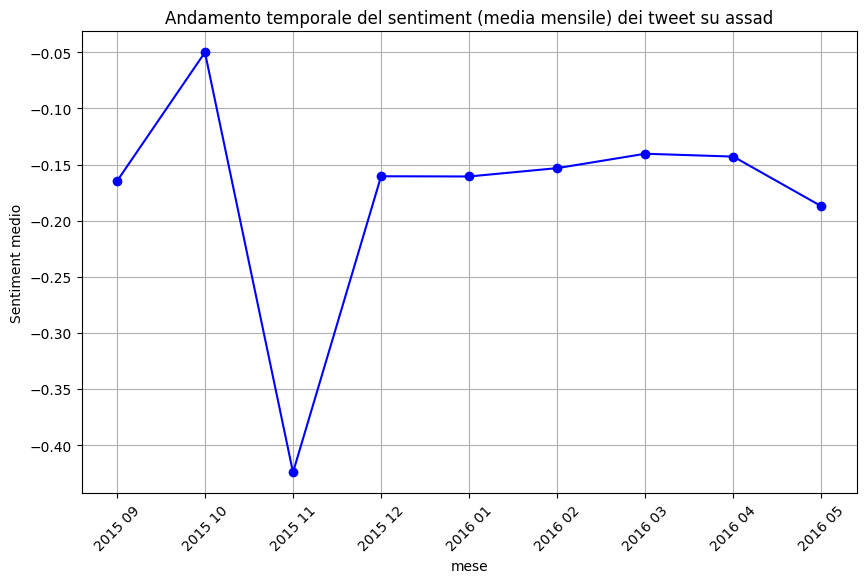

tweet su isis  sono:  2373


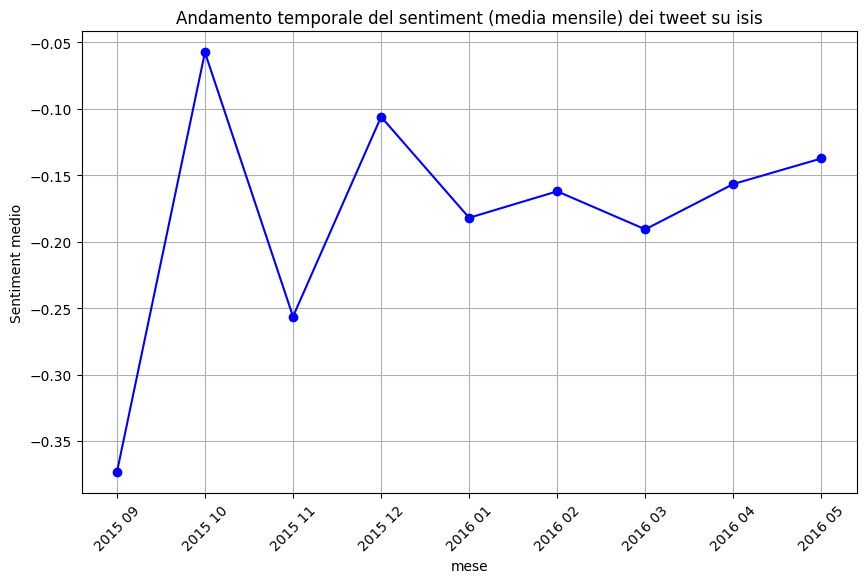

tweet su turkey  sono:  374


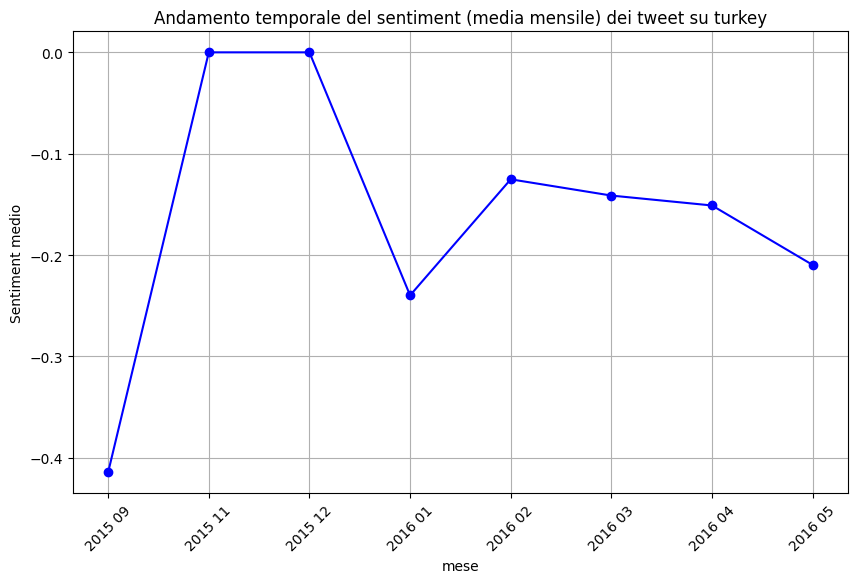

tweet su iraq  sono:  1294


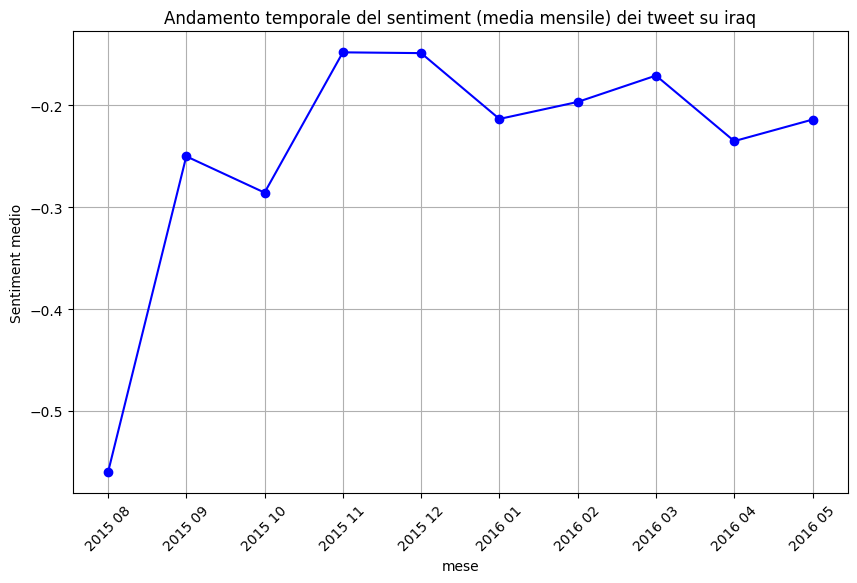

In [ ]:
for ent in ["assad","isis", "turkey", "iraq"]:
    tweetSuEnt = []
    tweetSuEntTime =[]
    tweetSuEntSent =[]
    for row in df.iterrows():
        if str(df.at[row[0], "tweetsInEng"]).lower().find(ent) !=-1:
            tweetSuEnt.append(df.at[row[0], "tweetsInEng"])
            tweetSuEntTime.append(df.at[row[0], "time"])
            tweetSuEntSent.append(df.at[row[0], "tweetSentimentWithoutPreProc"])
    assert len(tweetSuEntTime)==len(tweetSuEnt)==len(tweetSuEntSent)
    print("tweet su",ent," sono: ", len(tweetSuEnt))

    mydf = DataFrame()
    mydf['time'] = tweetSuEntTime
    mydf['sent'] = tweetSuEntSent
    monthly_sentiment = mydf.groupby(mydf['time'].dt.strftime('%Y %m'))['sent'].mean()
    # print("monthly_sentiment: ", monthly_sentiment)
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='b')
    plt.xlabel('mese')
    plt.xticks(rotation=45)
    plt.ylabel('Sentiment medio')
    plt.title('Andamento temporale del sentiment (media mensile) dei tweet su '+ ent)
    plt.grid(True)
    plt.show()

tutte e 4 le distribuzioni tendono ad assestarsi dall'inizio del 2016 in poi

### riguardiamo i tweet sull'isis in uno specifico timeframe

In [ ]:
inQuelPeriodo = df[(df['time'] > datetime(2015,10,1)) & (df['time'] < datetime(2015,12,1))]
print(len(inQuelPeriodo))

tweetSuIsis = []
tweetSuIsisSent =[]
for row in inQuelPeriodo.iterrows():
    if str(inQuelPeriodo.at[row[0], "tweetsInEng"]).lower().find("isis") !=-1:
        tweetSuIsis.append(inQuelPeriodo.at[row[0], "tweetsInEng"])
        tweetSuIsisSent.append(inQuelPeriodo.at[row[0], "tweetSentimentWithoutPreProc"])
assert len(tweetSuIsis)==len(tweetSuIsisSent)

mydf2 = DataFrame()
mydf2['tweet'] = tweetSuIsis
mydf2['sent'] = tweetSuIsisSent
print(mydf2.shape)

267
(18, 2)


In [ ]:
#stampo i suoi tweet del periodo con sentiment negativo:
negativi = mydf2[mydf2["sent"]<0]["tweet"]
negativi.to_csv("negativiSuIsis.csv")
print(negativi)

4     RT RamiAlLolah: Meanwhile; ISIS fighters after...
7     RT IsraelHatzolah: SHOCKING: ISIS release hebr...
8     RT finriswolf: Putin just before downing 'wann...
11    RT victorynewshd: While ISIS loses lands to Ba...
12                     Paris Attacks ISIS Islamic State
15    ParisAttacks Paris attacks: police hunt Jihadi...
16     Breaking News Jabhat al Nusra storm a meeting...
17           RT GreekAnalyst: The Anti-ISIS Coalition. 
Name: tweet, dtype: object


l'apparente motivo del crollo del sentiment dei tweet con "isis" in questo periodo sembra essere il fatto che i tweet coinvolti citano notizie di cronaca negative per l'isis e notizie riguardo all'attacco dell'isis a parigi del 13/11/2015.